In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")
print("Path to dataset files:", path)

Path to dataset files: /Users/vdubyna/.cache/kagglehub/datasets/jsphyg/weather-dataset-rattle-package/versions/2


In [2]:
import pandas as pd
df = pd.read_csv(path + '/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
print(df.isnull().mean().sort_values(ascending=False))

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64


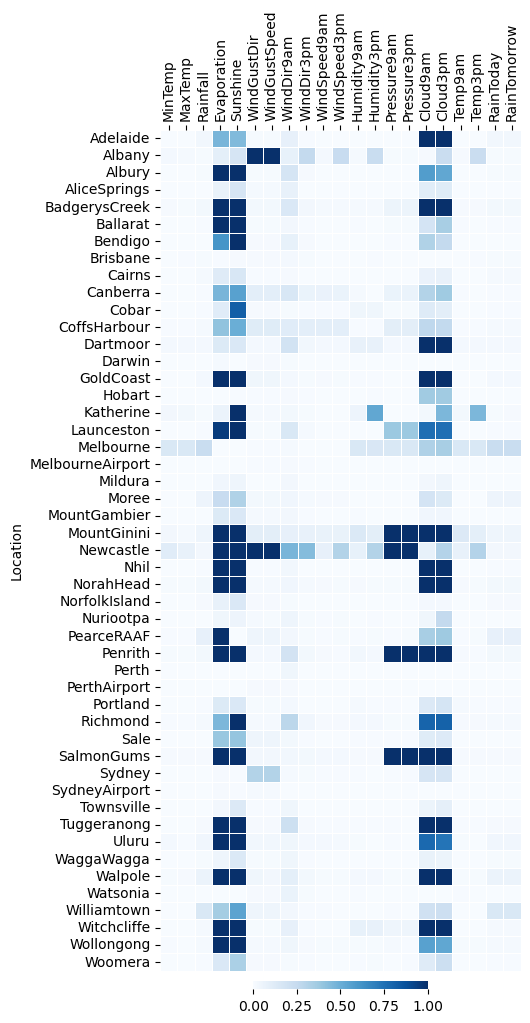

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

# Select only columns that are not 'Location' or 'Date'
cols = [col for col in df.columns if col not in ['Location', 'Date']]
# Group by 'Location' and then compute the mean of missing values for the selected columns
tmp = df.groupby('Location')[cols].apply(lambda x: x.isna().mean())

plt.figure(figsize=(9, 13))

ax = sns.heatmap(tmp,
        cmap='Blues',
        linewidth=0.5,
        square=True,
        cbar_kws=dict(
          location="bottom",
          pad=0.01,
          shrink=0.25))

ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=90)

plt.show()

In [5]:
df = df[df.columns[df.isna().mean().lt(0.35)]]
df = df.dropna(subset='RainTomorrow')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


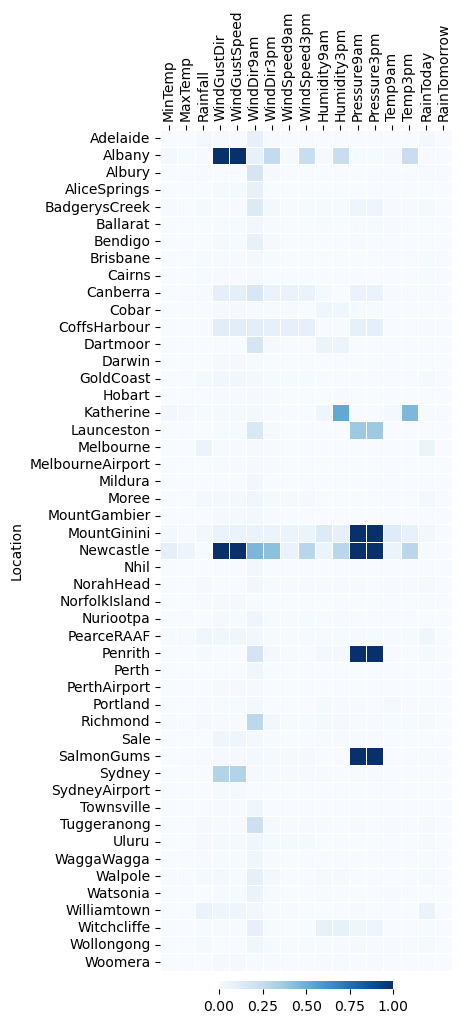

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

# Select only columns that are not 'Location' or 'Date'
cols = [col for col in df.columns if col not in ['Location', 'Date']]
# Group by 'Location' and then compute the mean of missing values for the selected columns
tmp = df.groupby('Location')[cols].apply(lambda x: x.isna().mean())

plt.figure(figsize=(9, 13))

ax = sns.heatmap(tmp,
                 cmap='Blues',
                 linewidth=0.5,
                 square=True,
                 cbar_kws=dict(
                     location="bottom",
                     pad=0.01,
                     shrink=0.25))

ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=90)

plt.show()

In [7]:
import numpy as np

data_num = df.select_dtypes(include=np.number)
data_cat = df.select_dtypes(include='object')

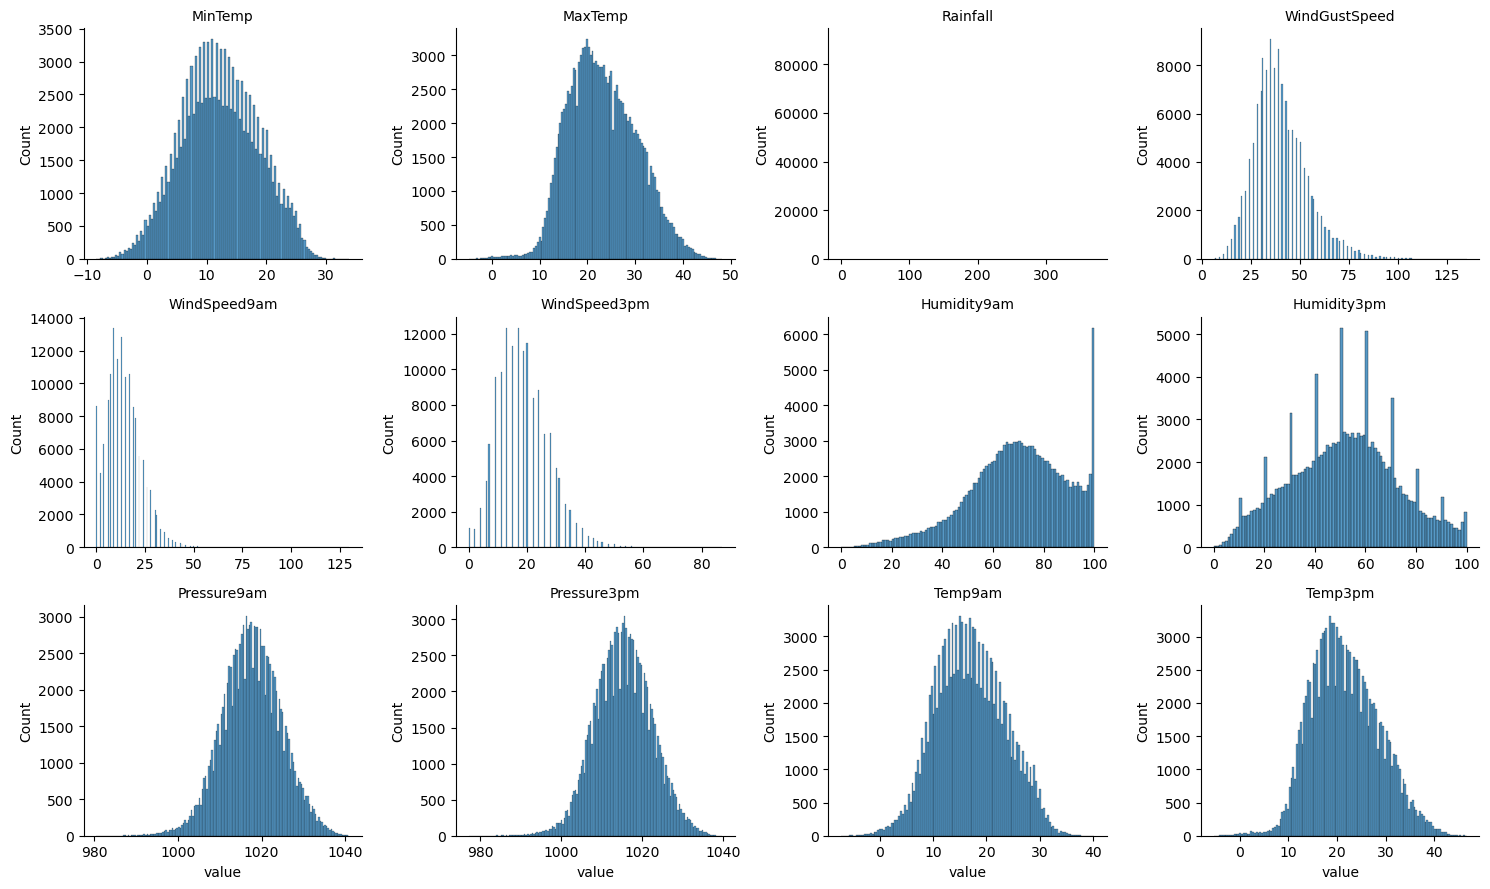

In [8]:
melted = data_num.melt()
g = sns.FacetGrid(melted,
                  col='variable',
                  col_wrap=4,
                  sharex=False,
                  sharey=False,
                  aspect=1.25)

g.map(sns.histplot, 'value')
g.set_titles(col_template='{col_name}')
g.tight_layout()
plt.show()

In [9]:
data_cat.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [10]:
data_cat['Date'] = pd.to_datetime(df['Date'])
data_cat[['Year', 'Month']] = (data_cat['Date'].apply(lambda x: pd.Series([x.year, x.month])))
data_cat.drop('Date', axis=1, inplace=True)
data_cat[['Year', 'Month']] = data_cat[['Year', 'Month']].astype(str)
data_cat[['Year', 'Month']].head()

,Year,Month
0,2008,12
1,2008,12
2,2008,12
3,2008,12
4,2008,12


In [11]:
data_num['Year'] = data_cat['Year'].astype(int)
data_cat.drop(columns=['Year'], inplace=True)

In [12]:
# Знаходимо максимальний рік спостережень
max_year = data_num['Year'].max()

# Створюємо булеві маски: для тестової вибірки - записи з максимальним роком,
# для тренувальної - всі інші записи
mask_test = data_num['Year'] == max_year
mask_train = data_num['Year'] != max_year

# Розбиваємо дані:
# Для числових ознак (data_num)
X_train_num = data_num.loc[mask_train].copy()
X_test_num = data_num.loc[mask_test].copy()
# Для категоріальних ознак (data_cat)
X_train_cat = data_cat.loc[mask_train].copy()
X_test_cat = data_cat.loc[mask_test].copy()

# Цільову змінну беремо з оригінального data_cat
y_train = X_train_cat['RainTomorrow']
y_test = X_test_cat['RainTomorrow']
# Видаляємо цільову з тестових і тренувальних даних
X_train_cat.drop(columns=['RainTomorrow'], inplace=True)
X_test_cat.drop(columns=['RainTomorrow'], inplace=True)

In [13]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer().set_output(transform='pandas')
X_train_num = num_imputer.fit_transform(X_train_num)
X_test_num = num_imputer.transform(X_test_num)

pd.concat([X_train_num, X_test_num]).isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Year             0
dtype: int64

In [14]:
cat_imputer = SimpleImputer(
    strategy='most_frequent').set_output(transform='pandas')
X_train_cat = cat_imputer.fit_transform(X_train_cat)
X_test_cat = cat_imputer.transform(X_test_cat)

pd.concat([X_train_cat, X_test_cat]).isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Month          0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform='pandas')

X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [16]:

from sklearn.preprocessing import OneHotEncoder

encoder = (OneHotEncoder(drop='if_binary', sparse_output=False).set_output(transform='pandas'))

X_train_cat = encoder.fit_transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

X_train_cat.shape

(133727, 110)

In [17]:
y_train.value_counts(normalize=True)

RainTomorrow
No     0.77481
Yes    0.22519
Name: proportion, dtype: float64

In [18]:
from sklearn.linear_model import LogisticRegression

X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)
clf = (LogisticRegression(solver='liblinear',
                          class_weight='balanced',
                          random_state=42)
       .fit(X_train, y_train))

pred = clf.predict(X_test)

Confusion Matrix (raw):
[[5491 1212]
 [ 494 1269]]


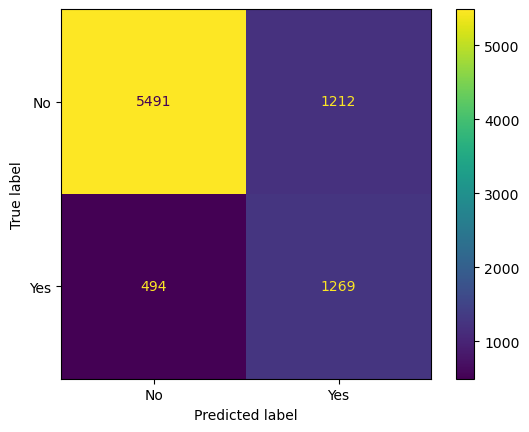

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, pred)
# Виводимо матрицю у консоль
print("Confusion Matrix (raw):")
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.92      0.82      0.87      6703
         Yes       0.51      0.72      0.60      1763

    accuracy                           0.80      8466
   macro avg       0.71      0.77      0.73      8466
weighted avg       0.83      0.80      0.81      8466



### Дані продуктивності моделі до змін
```text
              precision    recall  f1-score   support

          No       0.92      0.79      0.85     22098
         Yes       0.51      0.76      0.61      6341

    accuracy                           0.79     28439
   macro avg       0.72      0.78      0.73     28439
weighted avg       0.83      0.79      0.80     28439
```
### Дані продуктивності моделі після змін
```text
              precision    recall  f1-score   support

          No       0.92      0.82      0.87      6703
         Yes       0.51      0.72      0.60      1763

    accuracy                           0.80      8466
   macro avg       0.71      0.77      0.73      8466
weighted avg       0.83      0.80      0.81      8466
```

### Висновки

1.	Перехід від категоріального до числового представлення року:
Раніше рік був представленим як категоріальна ознака, що збільшувало кількість параметрів. Такий підхід дозволяє моделі бачити часовий тренд як послідовну змінну і лінійно враховувати його вплив на результат. Як видно з результатів, це не вплинуло негативно на якість класифікації
2.	Після змін: Accuracy трохи зросла до 80%, а показники для класу «No» трохи покращились (recall 0.82, f1-score 0.87), хоча для класу «Yes» показники залишились приблизно на тому ж рівні (точність 0.51, recall 0.72, f1-score 0.60).
3. Незважаючи на загальне покращення, якість прогнозування для класу «Yes» залишається нижчою, що є наслідком дисбалансу класів.